# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists to hold city data points
city_pull = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

#Store base URL as variable 
url = "http://api.openweathermap.org/data/2.5/weather?"

#Start count variable for printlog 
count = 0

#Print Log header 
print("Beginning Data Retrieval")
print("--------------------------------------------")

#Loop through API and pull data for each city in cities list
for city in range(len(cities)):
    
    #Use try except to allow processing through records that do not exist in weather map API
    try:
        print(f"Processing Record: {count} | {cities[city]}")
        response = requests.get(f"{url}units=Imperial&appid={owm_api_key}&q={cities[city].replace(' ', '%20')}").json()
        city_pull.append(response['name'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print("City not found. Skipping...")
        
    #Increase counter for print log
    count = count + 1
    
#Print log footer 
print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record: 0 | avarua
Processing Record: 1 | bandar-e torkaman
City not found. Skipping...
Processing Record: 2 | cherskiy
Processing Record: 3 | trincomalee
Processing Record: 4 | saint-philippe
Processing Record: 5 | road town
Processing Record: 6 | minot
Processing Record: 7 | belushya guba
City not found. Skipping...
Processing Record: 8 | taolanaro
City not found. Skipping...
Processing Record: 9 | zhicheng
Processing Record: 10 | cockburn town
Processing Record: 11 | tasiilaq
Processing Record: 12 | bethel
Processing Record: 13 | nanortalik
Processing Record: 14 | haines junction
Processing Record: 15 | vila velha
Processing Record: 16 | port alfred
Processing Record: 17 | yaan
Processing Record: 18 | ushuaia
Processing Record: 19 | maralal
Processing Record: 20 | kadykchan
City not found. Skipping...
Processing Record: 21 | asau
City not found. Skipping...
Processing Record: 22 | bredasdorp
Processing 

Processing Record: 214 | pevek
Processing Record: 215 | lompoc
Processing Record: 216 | caravelas
Processing Record: 217 | pedro juan caballero
Processing Record: 218 | brzi brod
City not found. Skipping...
Processing Record: 219 | sorong
Processing Record: 220 | yinchuan
Processing Record: 221 | ballitoville
Processing Record: 222 | carutapera
Processing Record: 223 | ulladulla
Processing Record: 224 | yithion
City not found. Skipping...
Processing Record: 225 | samalaeulu
City not found. Skipping...
Processing Record: 226 | sitka
Processing Record: 227 | cabo san lucas
Processing Record: 228 | fairbanks
Processing Record: 229 | collie
Processing Record: 230 | palu
Processing Record: 231 | reconquista
Processing Record: 232 | turukhansk
Processing Record: 233 | malakisi
City not found. Skipping...
Processing Record: 234 | porto novo
Processing Record: 235 | huainan
Processing Record: 236 | esna
Processing Record: 237 | boralday
Processing Record: 238 | bay roberts
Processing Record: 2

Processing Record: 431 | ulaanbaatar
Processing Record: 432 | itoman
Processing Record: 433 | naron
Processing Record: 434 | isangel
Processing Record: 435 | salar
Processing Record: 436 | souillac
Processing Record: 437 | el retorno
Processing Record: 438 | laela
Processing Record: 439 | leshukonskoye
Processing Record: 440 | warqla
City not found. Skipping...
Processing Record: 441 | okha
Processing Record: 442 | valparaiso
Processing Record: 443 | flagstaff
Processing Record: 444 | luganville
Processing Record: 445 | santarem
City not found. Skipping...
Processing Record: 446 | nuuk
Processing Record: 447 | lorengau
Processing Record: 448 | kissidougou
Processing Record: 449 | novaya zaimka
Processing Record: 450 | igrim
Processing Record: 451 | sao gabriel da cachoeira
Processing Record: 452 | latehar
Processing Record: 453 | winsum
Processing Record: 454 | lewisburg
Processing Record: 455 | cabinda
Processing Record: 456 | vallenar
Processing Record: 457 | qaqortoq
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Collect lists in a dictionary 
city_dict = {"City":city_pull,
             "Country":country,
             "Latitude":latitude,
             "Longitude":longitude,
             "Date":dates,
             "Temp":temperature,
             "Cloudiness":cloudiness,
             "Humidity":humidity,
             "Wind Speed":wind_speed }

#Change dictionary in to pandas dataframe 
city_weather_df = pd.DataFrame(city_dict)

#Verify the count of each column is the same and that there are over 500 samples
city_weather_df.count()

City          549
Country       549
Latitude      549
Longitude     549
Date          549
Temp          549
Cloudiness    549
Humidity      549
Wind Speed    549
dtype: int64

In [5]:
#Print dataframe sample
city_weather_df.head()

,City,Country,Latitude,Longitude,Date,Temp,Cloudiness,Humidity,Wind Speed
0,Avarua,CK,-21.21,-159.78,1538006400,82.40,75,74,8.05
1,Cherskiy,RU,68.75,161.30,1538008519,35.26,56,77,3.31
2,Trincomalee,LK,8.58,81.23,1538008520,72.52,48,99,3.31
3,Saint-Philippe,CA,45.36,-73.48,1538006400,66.20,75,82,11.41
4,Road Town,VG,18.42,-64.62,1538006400,82.94,40,78,10.29


In [6]:
#Export data to CSV
city_weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

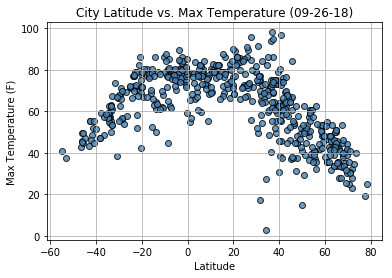

In [20]:
todaysdate = time.strftime("%m-%d-%y")
plt.scatter(city_weather_df['Latitude'], city_weather_df['Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.80)
plt.title("City Latitude vs. Max Temperature (" + todaysdate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#### Latitude vs. Humidity Plot

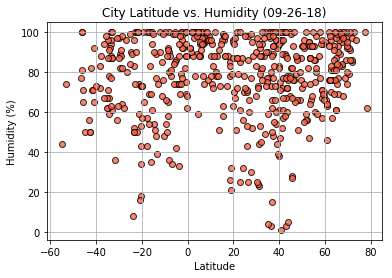

In [12]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], marker="o", facecolors="tomato", edgecolors="black", alpha=0.80)
plt.title("City Latitude vs. Humidity (" + todaysdate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#### Latitude vs. Cloudiness Plot

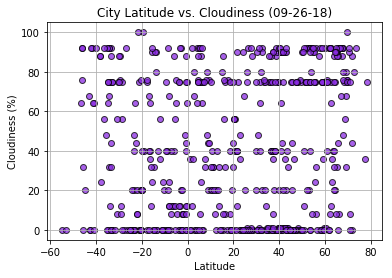

In [15]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'], marker="o", facecolors="blueviolet", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + todaysdate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#### Latitude vs. Wind Speed Plot

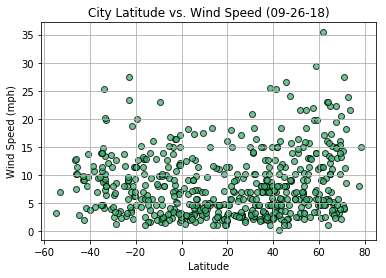

In [18]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed'], marker="o", facecolors="mediumseagreen", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (" + todaysdate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()